In [1]:
from const import *

from ClustDenFunc.plotDenFunc import setupPlotting
from ClustDenFunc.Toolbox import integrationDenFunc

from scipy.stats import norm

setupPlotting()

Packages installed successfully.
Virtual environment already exists. You can now use the tool.


In [2]:
dim = 1

H = np.arange(-5, 20, 0.0001)

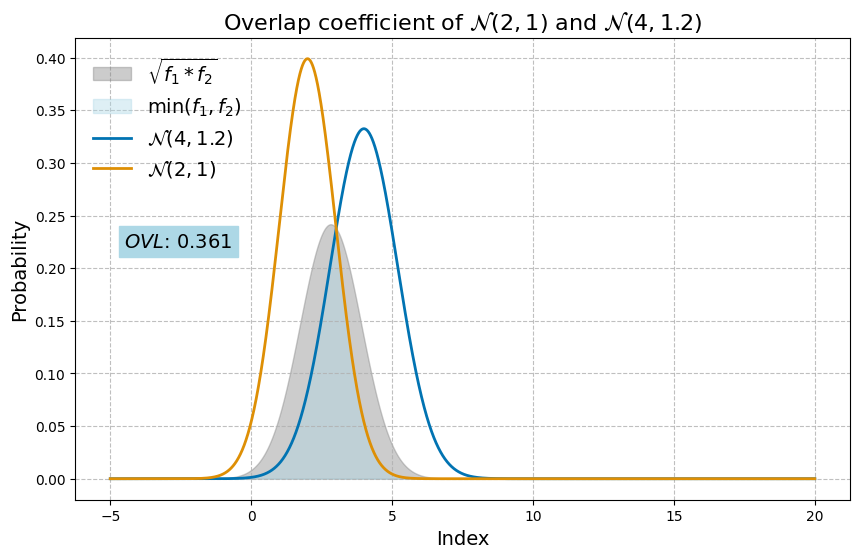

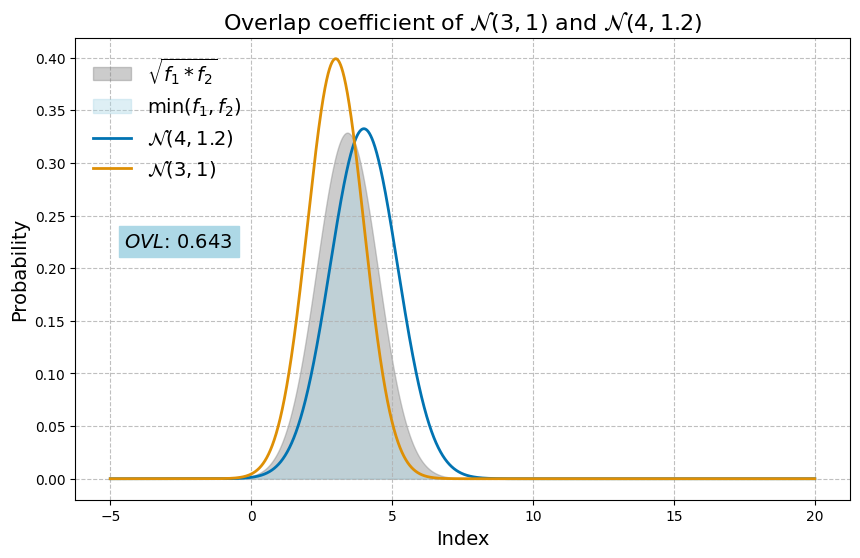

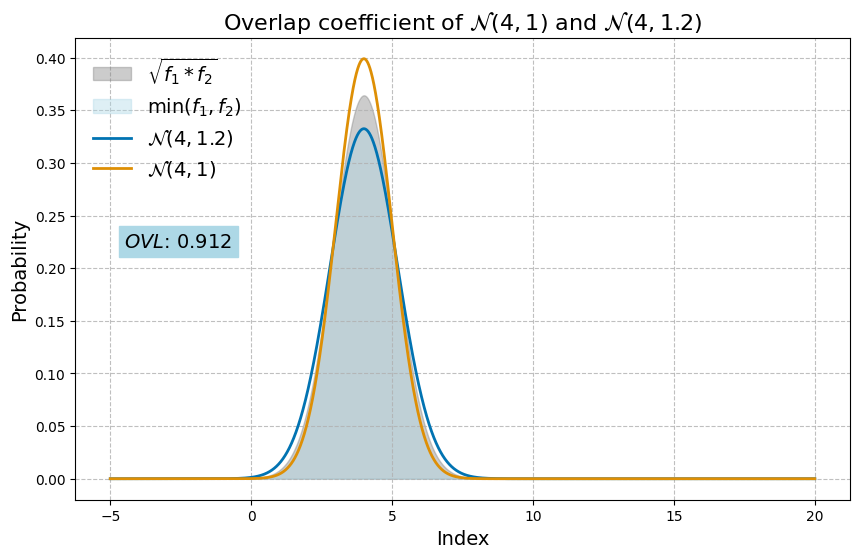

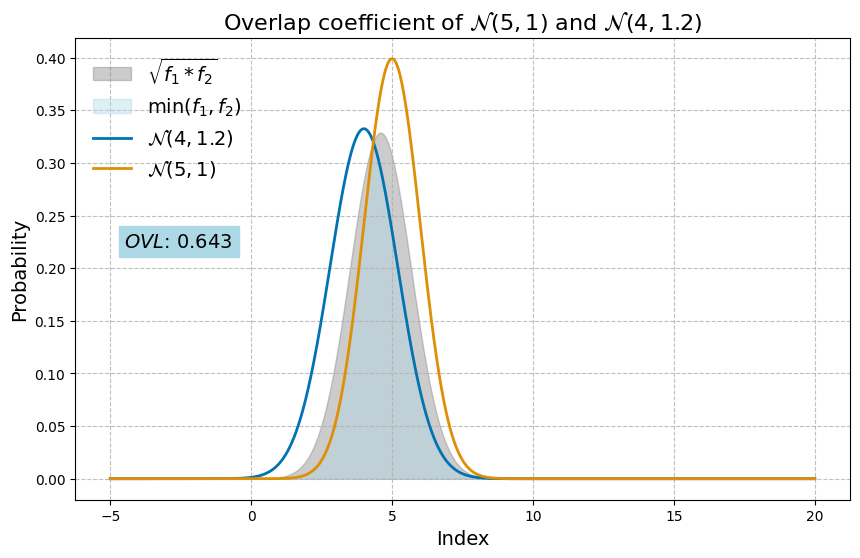

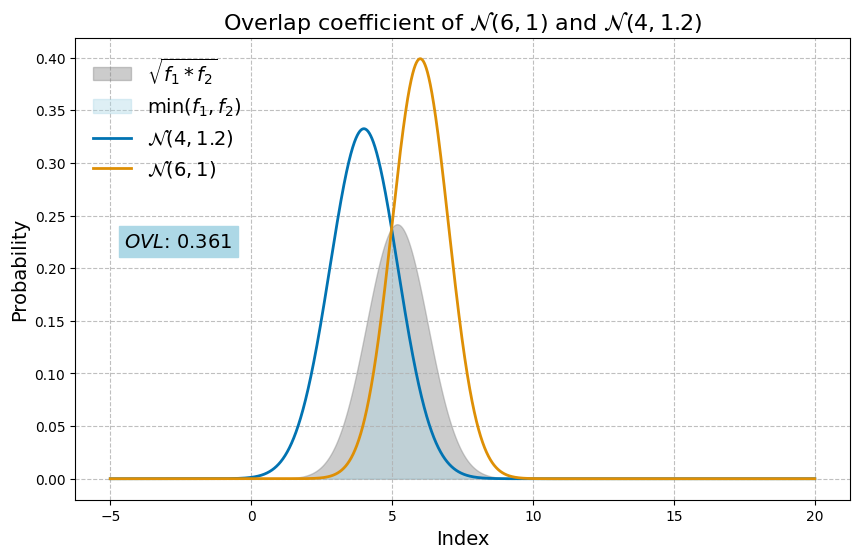

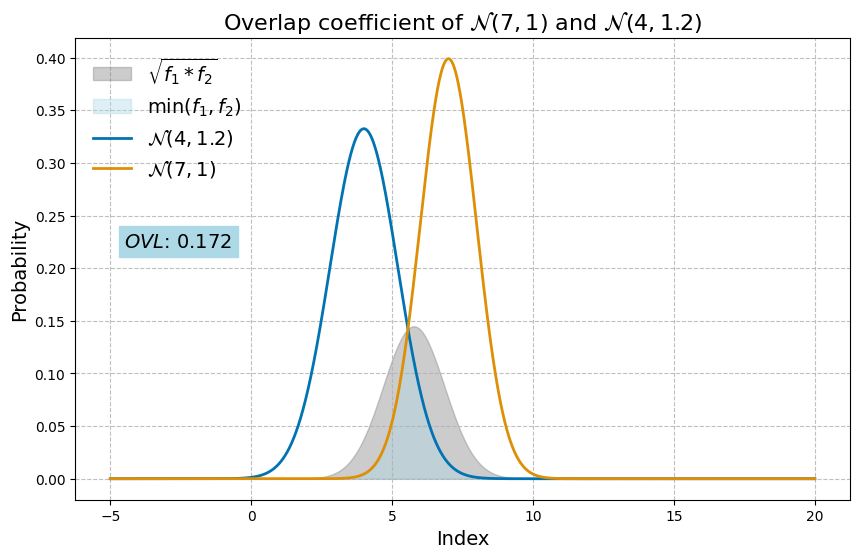

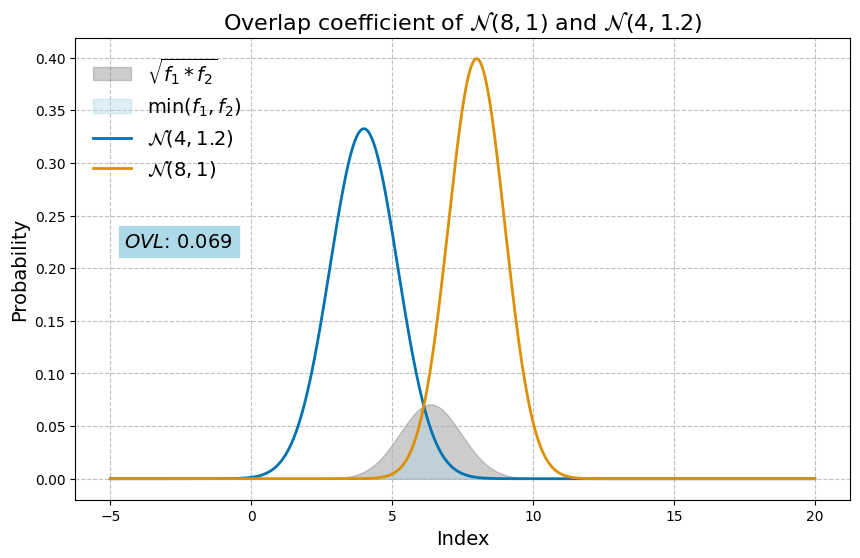

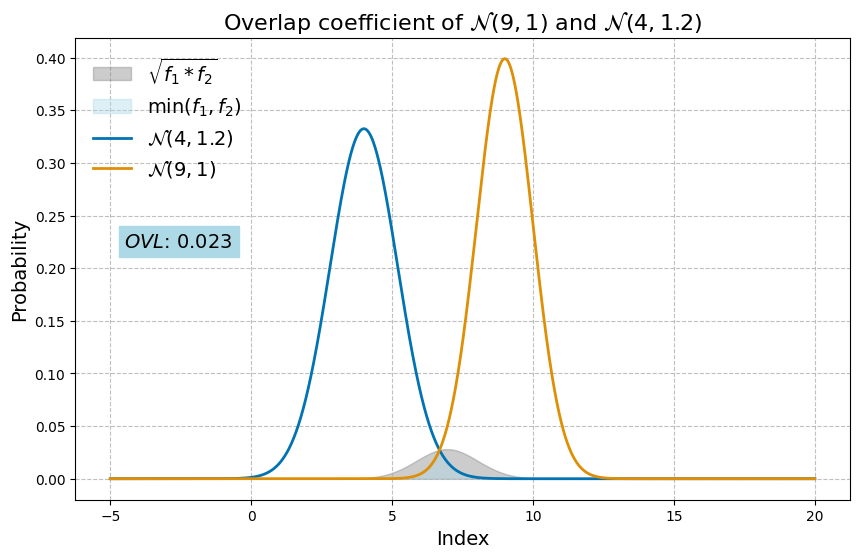

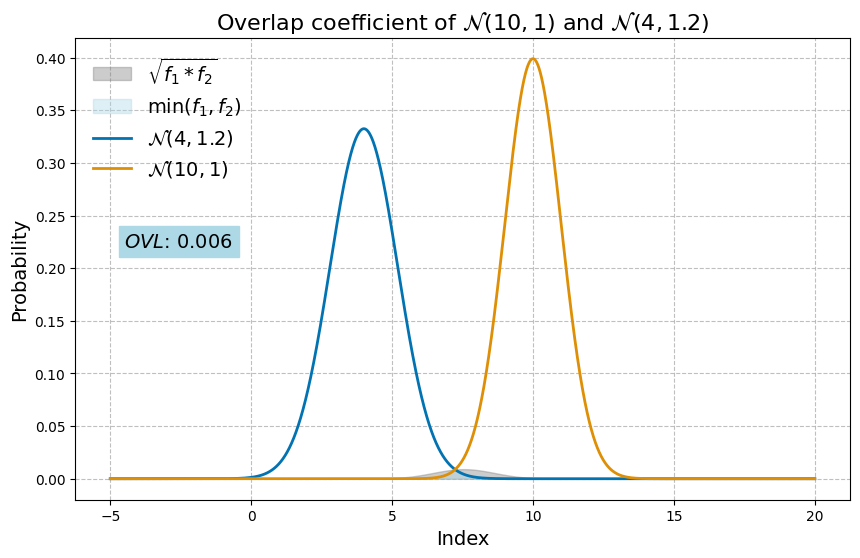

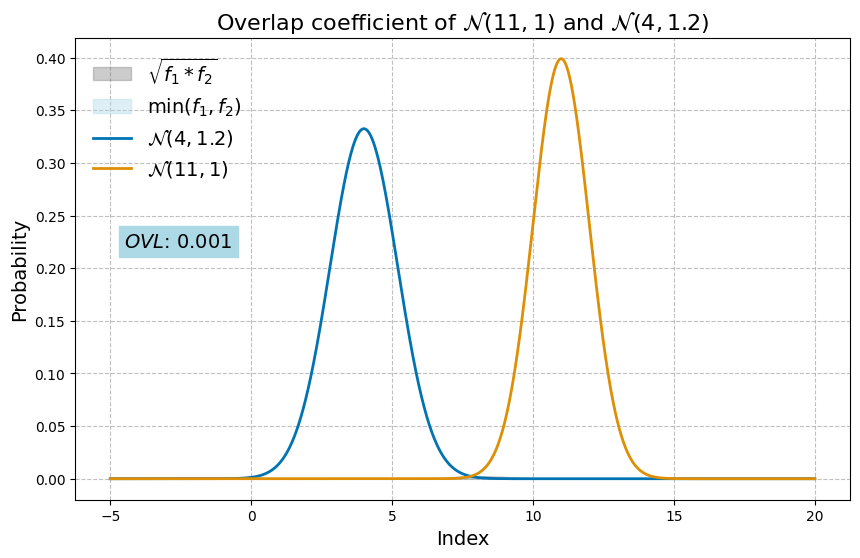

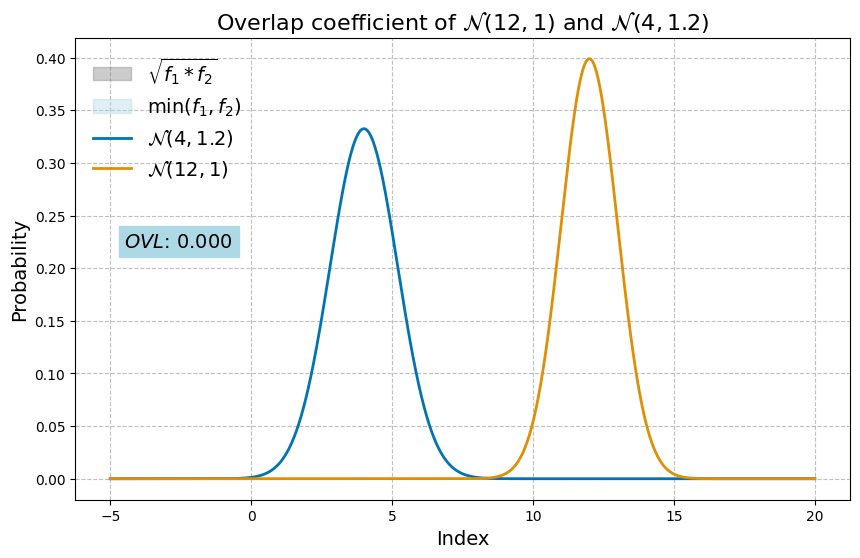

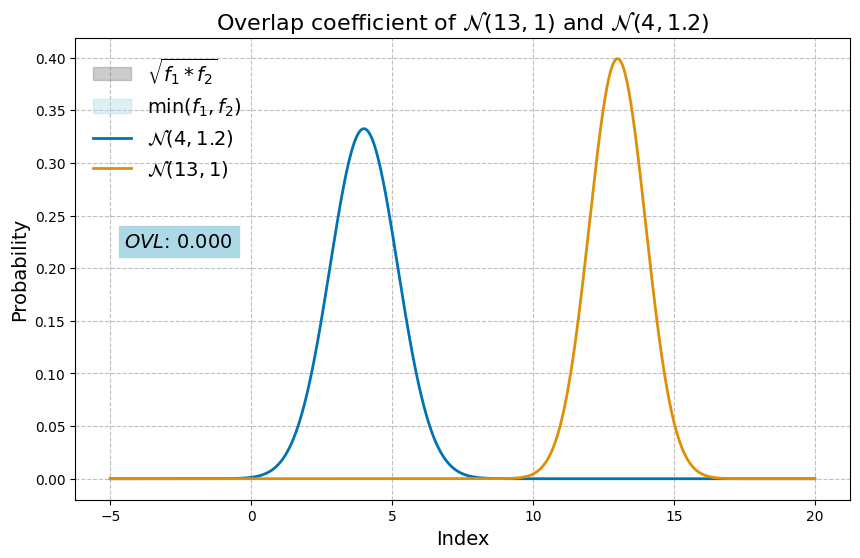

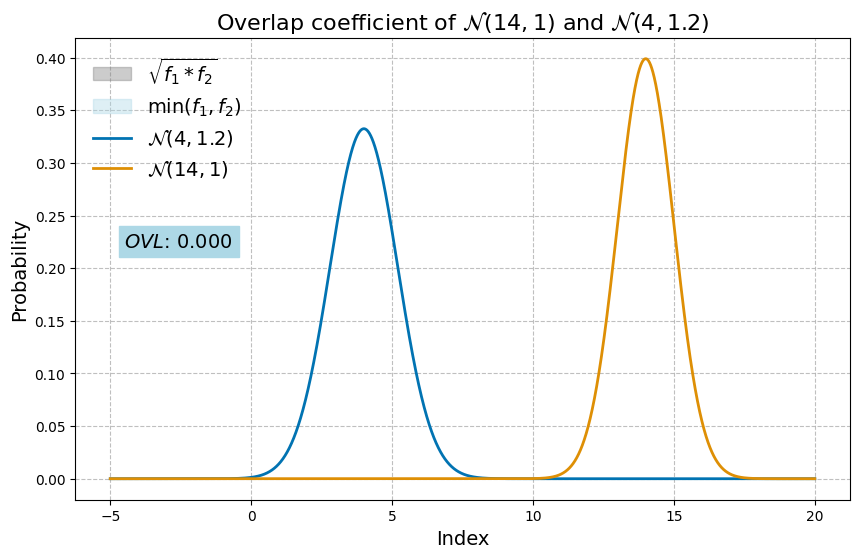

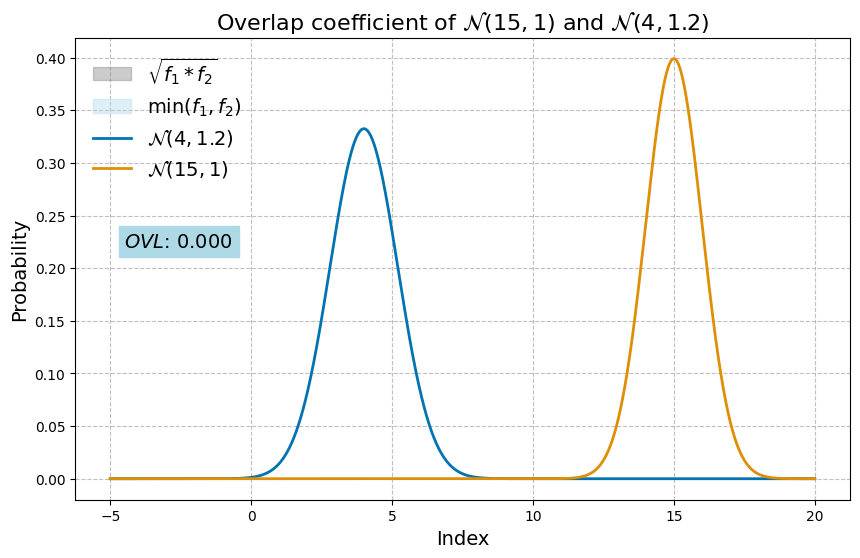

<Figure size 1000x600 with 0 Axes>

In [3]:
for mu in range(2, 16):
    N1 = norm.pdf(H, 4, 1.2)
    N2 = norm.pdf(H, mu, 1)

    plt.fill_between(H, 0, np.sqrt(N2 * N1), 
                     color='gray', 
                     alpha=0.4, 
                     label='$\\sqrt{f_1 * f_2}$')  
    plt.fill_between(H, 0, np.minimum(N1, N2), 
                     color='lightblue',
                     alpha=0.4, 
                     label='$\\min{(f_1, f_2)}$')  
    
    plt.plot(H, N1, label='$\\mathcal{N}(4, 1.2)$')  # Plot N1
    plt.plot(H, N2, label=f'$\\mathcal{{N}}({mu},1)$')  # Plot N2


    dx = H[1] - H[0]
    OVL = integrationDenFunc(np.minimum(N1, N2),dx)
    BC = integrationDenFunc(np.sqrt(N1 * N2), dx)

    plt.title(f'Overlap coefficient of $\\mathcal{{N}}({mu},1)$ and $\\mathcal{{N}}(4,1.2)$')
    plt.xlabel('Index')
    plt.ylabel('Probability')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys()) 
    plt.text(-4.5, 0.22, f'$OVL$: {OVL:.3f}', fontsize =14, backgroundcolor='lightblue')
    
    plt.pause(1)
    
    plt.clf()